## Quickstart Pytorch

## Installs:

In [23]:
# ! pip installs torch

# Imports:

In [24]:
# Pytorch
import torch # Pytorch
from torch import nn as nn # Neural Networks
from torch.utils.data import DataLoader # DataLoader Pytorch
from torchvision import datasets # Datasets in Pytorch
from torchvision.transforms import ToTensor # ToTensor Pytorch
from torch import optim  as optim # Optimizer

# Matplotlib
import matplotlib.pyplot as plt # Graphics for metrics

# Warnings
import warnings # Warnings

## Configs:

In [25]:

# Warnings
warnings.filterwarnings("ignore")

# Parameters and Hyperparameters

In [26]:
# Dictionary to store parameters and hyperparameters
args = {
    'device': 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu',
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'batch_size': 64,
    'num_workers': 2,
    'num_epochs': 30,
}

args

{'device': 'cuda',
 'lr': 0.0001,
 'weight_decay': 0.0005,
 'batch_size': 64,
 'num_workers': 2,
 'num_epochs': 30}

## Device

In [27]:
# Checking Device
print(f'Using {args["device"]} device')

Using cuda device


## Working with data

In [28]:
# Download Training data
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

In [29]:
# Download Validation data
validation_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

## DataLoader

In [30]:
# Defining DataLoader
train_dataloader = DataLoader(
    dataset = training_data,
    batch_size = args['batch_size'],
    num_workers = args['num_workers']
)

validation_dataloader = DataLoader(
    dataset = validation_data,
    batch_size = args['batch_size'],
    num_workers = args['num_workers']
)

In [31]:
# Vizualing DataLoader
for X, y in train_dataloader:
    print(f'Shape of X [N, C, H, W]: {X.shape}')
    print(f'Shape of y: {y.shape} {y.dtype}')
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## Model

In [32]:
# Defining model
class NeuralNetwork(nn.Module):

    def __init__(self):
        super().__init__()

        # Creates a layer that transforms the input (a 2D image) into a 1D vector.
        self.flatten = nn.Flatten()

        # Sequence of linear layers (total of three layers).
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, X):
        X = self.flatten(X)
        logits = self.linear_relu_stack(X)

        return logits

model = NeuralNetwork().to(args['device']) # Cast Network in Device
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Loss

In [33]:
loss_fn = nn.CrossEntropyLoss().to(args['device'])

## Optimizer

In [34]:
optimizer = optim.Adam(model.parameters(), lr = args['lr'], weight_decay = args['weight_decay'])

## Training Flow

In [35]:
def train(dataloader, model, loss_fn, optimizer):

    # Size dataset training
    size = len(dataloader.dataset)

    # Count numbers batch
    num_batches = len(dataloader)

    # List of Metrics
    train_loss, correct = 0, 0

    # Defining the model for training
    model.train()

    # Separating data from labels
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(args['device']), y.to(args['device'])

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Storing errors and successes in variables
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Generating an output to follow the batch training
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'Loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

    # Average Loss and Accuracy for an epoch
    train_loss /= num_batches
    correct /= size

    print(f'\nTrain Metrics: \nAccuracy: {(100*correct):>0.1f}%, AVG Loss: {train_loss:>8f} \n')

    return train_loss, correct

In [36]:
def validation(dataloader, model, loss_fn):

    # Size dataset training
    size = len(dataloader.dataset)

    # Count numbers batch
    num_batches = len(dataloader)

    # List of Metrics
    val_loss, correct = 0, 0

    # Defining the model for Validation
    model.eval()

    # Disabling the gradient calculation engine in PyTorch
    with torch.no_grad():

        # Separating data from labels
        for X, y in (dataloader):
            X, y = X.to(args['device']), y.to(args['device'])

            # Compute prediction error
            pred = model(X)

            # Generating an output to follow the batch training
            val_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Average Loss and Accuracy for an epoch
    val_loss /= num_batches
    correct /= size

    print(f'Validation Metrics: \nAccuracy: {(100*correct):>0.1f}%, AVG Loss: {val_loss:>8f} \n')

    return val_loss, correct

In [37]:
train_loss, validation_loss = [], []
train_acc, validation_acc = [], []

for t in range(args['num_epochs']):
    print(f'Epoch {t + 1}\n-------------------------------')

    loss, acc = train(train_dataloader, model, loss_fn, optimizer)
    train_loss.append(loss)
    train_acc.append(acc)

    loss, acc = validation(validation_dataloader, model, loss_fn)
    validation_loss.append(loss)
    validation_acc.append(acc)
print('Done!')

Epoch 1
-------------------------------
Loss: 2.304525 [    0/60000]
Loss: 1.025547 [ 6400/60000]
Loss: 0.564775 [12800/60000]
Loss: 0.745015 [19200/60000]
Loss: 0.597545 [25600/60000]
Loss: 0.518488 [32000/60000]
Loss: 0.517433 [38400/60000]
Loss: 0.667649 [44800/60000]
Loss: 0.617448 [51200/60000]
Loss: 0.483481 [57600/60000]

Train Metrics: 
Accuracy: 78.1%, AVG Loss: 0.673857 

Validation Metrics: 
Accuracy: 82.2%, AVG Loss: 0.497004 

Epoch 2
-------------------------------
Loss: 0.378137 [    0/60000]
Loss: 0.499660 [ 6400/60000]
Loss: 0.347841 [12800/60000]
Loss: 0.540999 [19200/60000]
Loss: 0.432466 [25600/60000]
Loss: 0.428750 [32000/60000]
Loss: 0.405147 [38400/60000]
Loss: 0.608216 [44800/60000]
Loss: 0.559660 [51200/60000]
Loss: 0.423021 [57600/60000]

Train Metrics: 
Accuracy: 84.6%, AVG Loss: 0.440172 

Validation Metrics: 
Accuracy: 84.3%, AVG Loss: 0.442060 

Epoch 3
-------------------------------
Loss: 0.292470 [    0/60000]
Loss: 0.428278 [ 6400/60000]
Loss: 0.297287

## Convergence Analysis

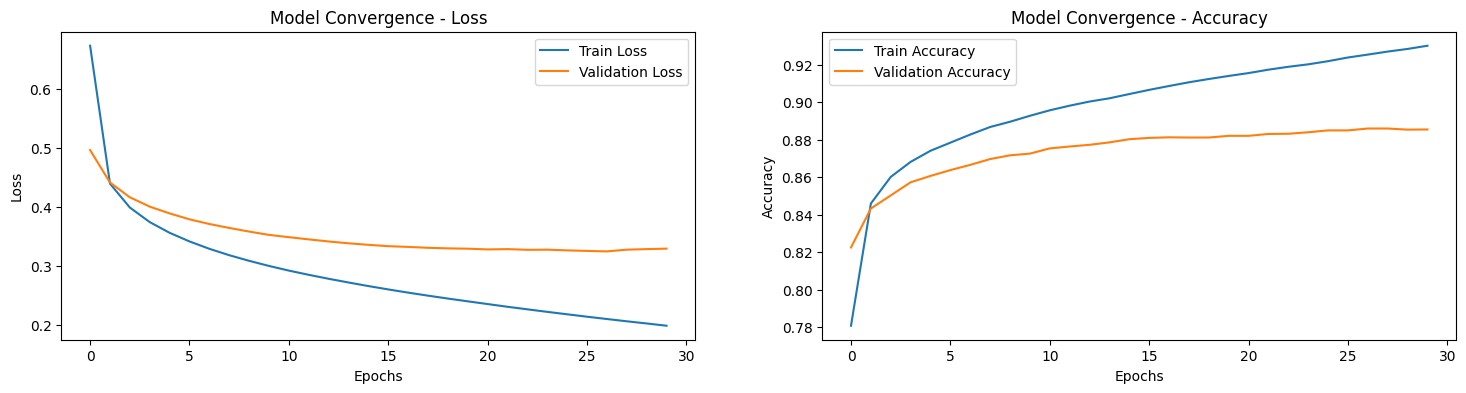

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 4))

ax1.plot(train_loss, label = 'Train Loss')
ax1.plot(validation_loss, label = 'Validation Loss')
ax1.set_title('Model Convergence - Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(train_acc, label = 'Train Accuracy')
ax2.plot(validation_acc, label = 'Validation Accuracy')
ax2.set_title('Model Convergence - Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

## Saving Models

In [39]:
torch.save(model.state_dict(), 'model.pth')
print('Saved Pytorch Model State to model.pth')

Saved Pytorch Model State to model.pth


## Loading Models

In [40]:
model = NeuralNetwork().to(args['device'])
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [41]:
! ls

data  model.pth  sample_data


## Classes

In [42]:
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

## Function prediction

In [43]:
def prediction(data_test, idx_test):

    model.eval()
    X, y = data_test[idx_test][0], validation_data[idx_test][1]
    with torch.no_grad():
        X = X.to(args['device'])
        pred= model(X)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        print(f'Predicted: {predicted}\nActual: {actual}')

In [44]:
for idx in range(10):
    print(f'Prediction: {idx}')
    prediction(validation_data, idx)
    print('\n')

Prediction: 0
Predicted: Ankle boot
Actual: Ankle boot


Prediction: 1
Predicted: Pullover
Actual: Pullover


Prediction: 2
Predicted: Trouser
Actual: Trouser


Prediction: 3
Predicted: Trouser
Actual: Trouser


Prediction: 4
Predicted: Shirt
Actual: Shirt


Prediction: 5
Predicted: Trouser
Actual: Trouser


Prediction: 6
Predicted: Coat
Actual: Coat


Prediction: 7
Predicted: Shirt
Actual: Shirt


Prediction: 8
Predicted: Sandal
Actual: Sandal


Prediction: 9
Predicted: Sneaker
Actual: Sneaker


